# BOOK RECOMMENDATION SYSTEM

  Recommend similar books to the reader based on their interest.
  #### Two approaches:

1. ##### Popularity Based Model:
Prioritize items based on both their average rating and the number of ratings they have received. Ensures that popular items with high ratings are given more importance when making recommendations, resulting in more relevant suggestions for users.

2. ##### Collaborative Filtering Based Approach:
Predicts user’s preferences by collecting information from many users (collaborating) and finding patterns or similarities among their preferences.


### Import Libraries

In [72]:
import numpy as np #For numerical operations
import pandas as pd #For data manipulation and analysis
import matplotlib.pyplot as plt #For creating visualization
import seaborn as sns #For advanced data visualization
import warnings as w  #For managing warnings
import pandas_profiling
from pandas_profiling import ProfileReport

#Suppressing potential warnings
w.filterwarnings("ignore")

### Import datasets

In [73]:
books = pd.read_csv('Datasets/books.csv' , low_memory=False)
users = pd.read_csv('Datasets/users.csv')
ratings = pd.read_csv('Datasets/ratings.csv')

In [74]:
#Reading first few rows of books dataframe
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [75]:
#Reading first few rows of users dataframe
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [76]:
#Reading first few rows of ratings dataframe
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### SHAPE

In [77]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


### MISSING VALUES

In [78]:
#count missing values in books.csv
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [79]:
#count missing values in users.csv
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [80]:
#count missing values in ratings.csv
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

### DUPLICATES

In [81]:
books.duplicated().sum()

0

In [82]:
users.duplicated().sum()

0

In [83]:
ratings.duplicated().sum()

0

### Exploratory Data Analysis (EDA)

* Some important Exploratory Data Analysis like the most popular books, most popular authors, authors with highest books, and publishers with the highest number of published books were seen through the following graphs.
* Sorting books based on average rating in descending order and viewing the top 50 books with the highest average ratings.
* Data Visualization Results with the most rated books are 5, 8, and 10.

In [84]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [85]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [86]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [87]:
print(books.describe())
print(users.describe())
print(ratings.describe())

              ISBN      Book-Title      Book-Author Year-Of-Publication  \
count       271360          271360           271358              271360   
unique      271360          242135           102022                 118   
top     0195153448  Selected Poems  Agatha Christie                2002   
freq             1              27              632               17627   

        Publisher                                        Image-URL-S  \
count      271358                                             271360   
unique      16807                                             271044   
top     Harlequin  http://images.amazon.com/images/P/185326119X.0...   
freq         7535                                                  2   

                                              Image-URL-M  \
count                                              271360   
unique                                             271044   
top     http://images.amazon.com/images/P/185326119X.0...   
freq               

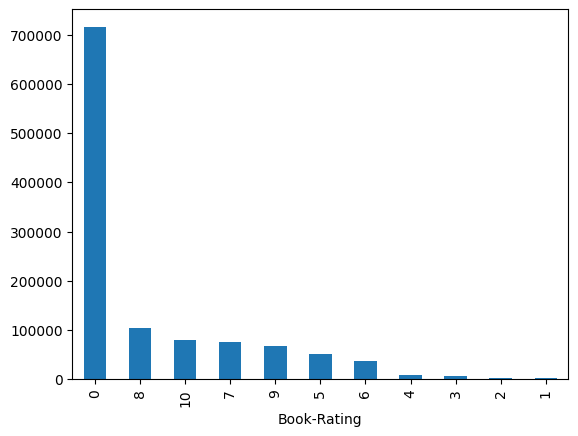

In [88]:
# Visualizing the distribution of book ratings using a bar plot

# Plotting the count of each unique rating value using the value_counts() method
ratings['Book-Rating'].value_counts().plot(kind='bar')

# Adding labels to the plot
plt.xlabel('Book-Rating') # X-axis label

# Displaying the plot
plt.show()


In [89]:
# Selecting books with duplicated authors in the 'Book-Author' column
# Filters the DataFrame books to identify books authored by the same author
books[books['Book-Author'].duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
62,0679865691,Haveli (Laurel Leaf Books),SUZANNE FISHER STAPLES,1995,Laurel Leaf,http://images.amazon.com/images/P/0679865691.0...,http://images.amazon.com/images/P/0679865691.0...,http://images.amazon.com/images/P/0679865691.0...
67,0804106304,The Joy Luck Club,Amy Tan,1994,Prentice Hall (K-12),http://images.amazon.com/images/P/0804106304.0...,http://images.amazon.com/images/P/0804106304.0...,http://images.amazon.com/images/P/0804106304.0...
74,0345465083,Seabiscuit,LAURA HILLENBRAND,2003,Ballantine Books,http://images.amazon.com/images/P/0345465083.0...,http://images.amazon.com/images/P/0345465083.0...,http://images.amazon.com/images/P/0345465083.0...
92,8445071769,El Senor De Los Anillos: Las DOS Torres (Lord ...,J. R. R. Tolkien,2001,Minotauro,http://images.amazon.com/images/P/8445071769.0...,http://images.amazon.com/images/P/8445071769.0...,http://images.amazon.com/images/P/8445071769.0...
93,8445071777,El Senor De Los Anillos: El Retorno Del Rey (T...,J. R. R. Tolkien,2001,Distribooks,http://images.amazon.com/images/P/8445071777.0...,http://images.amazon.com/images/P/8445071777.0...,http://images.amazon.com/images/P/8445071777.0...
...,...,...,...,...,...,...,...,...
271353,014002803X,Anti Death League,Kingsley Amis,1975,Viking Press,http://images.amazon.com/images/P/014002803X.0...,http://images.amazon.com/images/P/014002803X.0...,http://images.amazon.com/images/P/014002803X.0...
271354,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...


In [90]:
#To get author_book_count_top50

#Identify duplicate authors
duplicate_authors = books[books['Book-Author'].duplicated()]['Book-Author'].unique()

#Filter the DataFrame to include only books by these authors
same_author_books = books[books['Book-Author'].isin(duplicate_authors)]

#Count the number of books written by each author
author_book_count = same_author_books['Book-Author'].value_counts()

#Sort the counts in descending order and select the top 50 authors
author_book_count_top50 = author_book_count.head(50)

# Display the result
print(author_book_count_top50)

Book-Author
Agatha Christie           632
William Shakespeare       567
Stephen King              524
Ann M. Martin             423
Carolyn Keene             373
Francine Pascal           372
Isaac Asimov              330
Nora Roberts              315
Barbara Cartland          307
Charles Dickens           302
Not Applicable (Na )      286
R. L. Stine               282
Mark Twain                231
Jane Austen               223
Terry Pratchett           220
Mary Higgins Clark        218
Piers Anthony             217
Marion Zimmer Bradley     216
Janet Dailey              214
Franklin W. Dixon         204
Roald Dahl                195
Tom Clancy                174
J. R. R. Tolkien          174
Dick Francis              174
Danielle Steel            173
Anne McCaffrey            172
John Steinbeck            172
Nathaniel Hawthorne       165
Fern Michaels             165
Enid Blyton               164
Diana Palmer              164
Don Pendleton             162
Ed McBain                 15

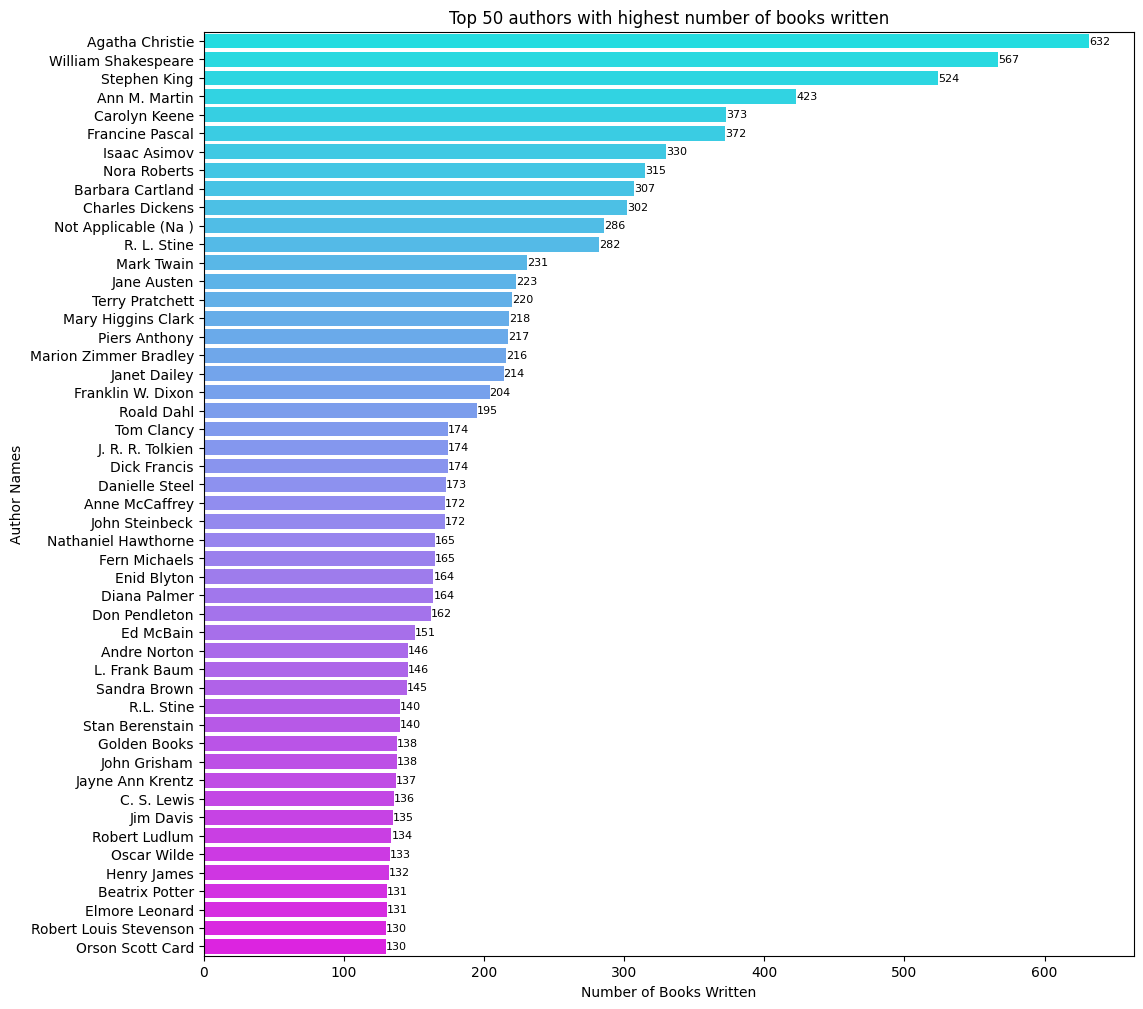

In [91]:
# Using the "cool" color palette from seaborn for visualization
cool = sns.color_palette("cool", n_colors=len(author_book_count_top50.values))

# Setting the figure size for the plot
plt.figure(figsize=(12, 12))

# Creating a horizontal bar plot using seaborn's barplot function
sns_plot = sns.barplot(y=author_book_count_top50.index,
                       x=author_book_count_top50.values, palette=cool, orient='h')

# Adding text annotations to display the exact number of books written by each author
for i, value in enumerate(author_book_count_top50.values):
    sns_plot.text(value, i, int(value), ha="left",
                  va="center", color='black', fontsize=8)

# Adding labels and title to the plot
plt.ylabel("Author Names")
plt.xlabel("Number of Books Written")
plt.title("Top 50 authors with highest number of books written")
plt.show()


In [92]:
#count the number of books published by each publisher
publishers = books['Publisher'].value_counts()

#Display the count of books for each publisher
publishers

Publisher
Harlequin                  7535
Silhouette                 4220
Pocket                     3905
Ballantine Books           3783
Bantam Books               3646
                           ... 
Hannover House                1
Amber Quill Press, LLC.       1
Lunchbox Press                1
Ugly Town                     1
Connaught                     1
Name: count, Length: 16807, dtype: int64

In [93]:
#Sorting publishers based on their occurences in descending order
top_50_publishers = publishers.sort_values(ascending=False)[:51]

#Display the top 50 publishers with the highest occurences
top_50_publishers

Publisher
Harlequin                             7535
Silhouette                            4220
Pocket                                3905
Ballantine Books                      3783
Bantam Books                          3646
Scholastic                            3160
Simon &amp; Schuster                  2971
Penguin Books                         2844
Berkley Publishing Group              2771
Warner Books                          2727
Penguin USA                           2717
Harpercollins                         2525
Fawcett Books                         2258
Signet Book                           2070
Random House Inc                      2045
St Martins Pr                         1953
St. Martin's Press                    1783
Tor Books                             1704
HarperCollins Publishers              1700
Zebra Books                           1694
Bantam                                1660
Avon                                  1566
Jove Books                            1553
V

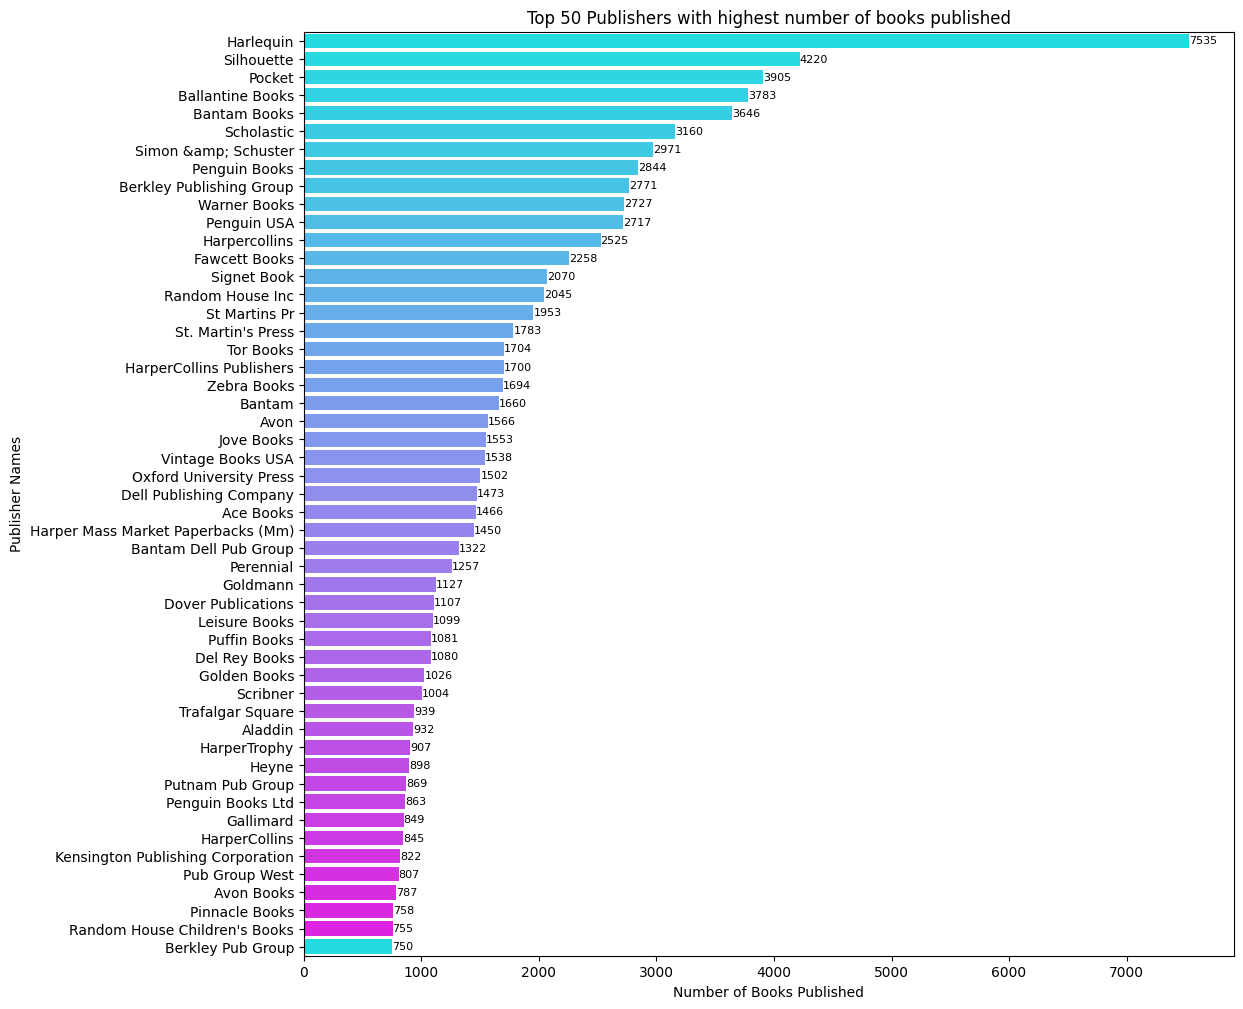

In [94]:
# Generate a color palette using the "cool" color scheme
cool = sns.color_palette("cool", n_colors=len(author_book_count_top50.values))

# Set the figure size for the plot
plt.figure(figsize=(12, 12))

# Create a horizontal bar plot using seaborn
sns_plot = sns.barplot(y=top_50_publishers.index,
                       x=top_50_publishers.values, palette=cool, orient='h')

# Add annotations to display the exact number of books published for each publisher
for i, value in enumerate(top_50_publishers.values):
    sns_plot.text(value, i, int(value), ha="left",
                  va="center", color='black', fontsize=8)

# Set labels and title for the plot
plt.ylabel("Publisher Names")
plt.xlabel("Number of Books Published")
plt.title("Top 50 Publishers with highest number of books published")
plt.show()


In [95]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [96]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [97]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [98]:
display(books.shape)
display(ratings.shape)
display(users.shape)

(271360, 8)

(1149780, 3)

(278858, 3)

In [99]:
# Merge the datasets on the ISBN column
merged_df = pd.merge(ratings, books, on='ISBN', how='inner')

# Calculate the average rating
average_rating_df = merged_df.groupby('ISBN')['Book-Rating'].mean().reset_index()
average_rating_df.rename(columns={'Book-Rating': 'average_rating'}, inplace=True)
merged = pd.merge(merged_df, average_rating_df, on='ISBN', how='inner')

# Select only ISBN and average_rating columns
averageRatingOnly = merged[['ISBN', 'average_rating']]

# Round the average_rating values to one digit after the decimal point
averageRatingOnly['average_rating'] = averageRatingOnly['average_rating'].round(1)

In [100]:
merged_df.shape

(1031136, 10)

In [101]:
merged.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,average_rating
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,2.933333
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,2.500000
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,4.060345
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,3.000000
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,6.000000


In [102]:
averageRatingOnly.head()

,ISBN,average_rating
0,034545104X,2.9
1,0155061224,2.5
2,0446520802,4.1
3,052165615X,3.0
4,0521795028,6.0


In [103]:
# Extracting ISBNs and their corresponding average ratings from the DataFrame 'averageRatingOnly' and storing them in 'averageRatingUnique'

#Subset the dataframe to include only the 'ISBN' and 'Average-Rating' columns
#Then drop duplicate rows based on the ISBN column to keep only unique ISBNs

averageRatingUnique = averageRatingOnly[['ISBN', 'average_rating']].drop_duplicates(subset=['ISBN'])

# Displaying the first few rows of the DataFrame 'averageRatingUnique' to inspect the results
print(averageRatingUnique.head())

         ISBN  average_rating
0  034545104X             2.9
1  0155061224             2.5
2  0446520802             4.1
3  052165615X             3.0
4  0521795028             6.0


In [104]:
# Merging the "books" dataframe with the "averageRatingUnique" dataframe based on the 'ISBN' column, using inner join
ratingBooks = pd.merge(books, averageRatingUnique, on='ISBN', how='inner')


In [105]:

# Displaying the shape of the "books" dataframe
display(books.shape)

# Displaying the shape of the "averageRatingUnique" dataframe
display(averageRatingUnique.shape)


(271360, 8)

(270151, 2)

In [106]:
ratings_sorted = averageRatingUnique.groupby('average_rating').size().sort_index(ascending=False)


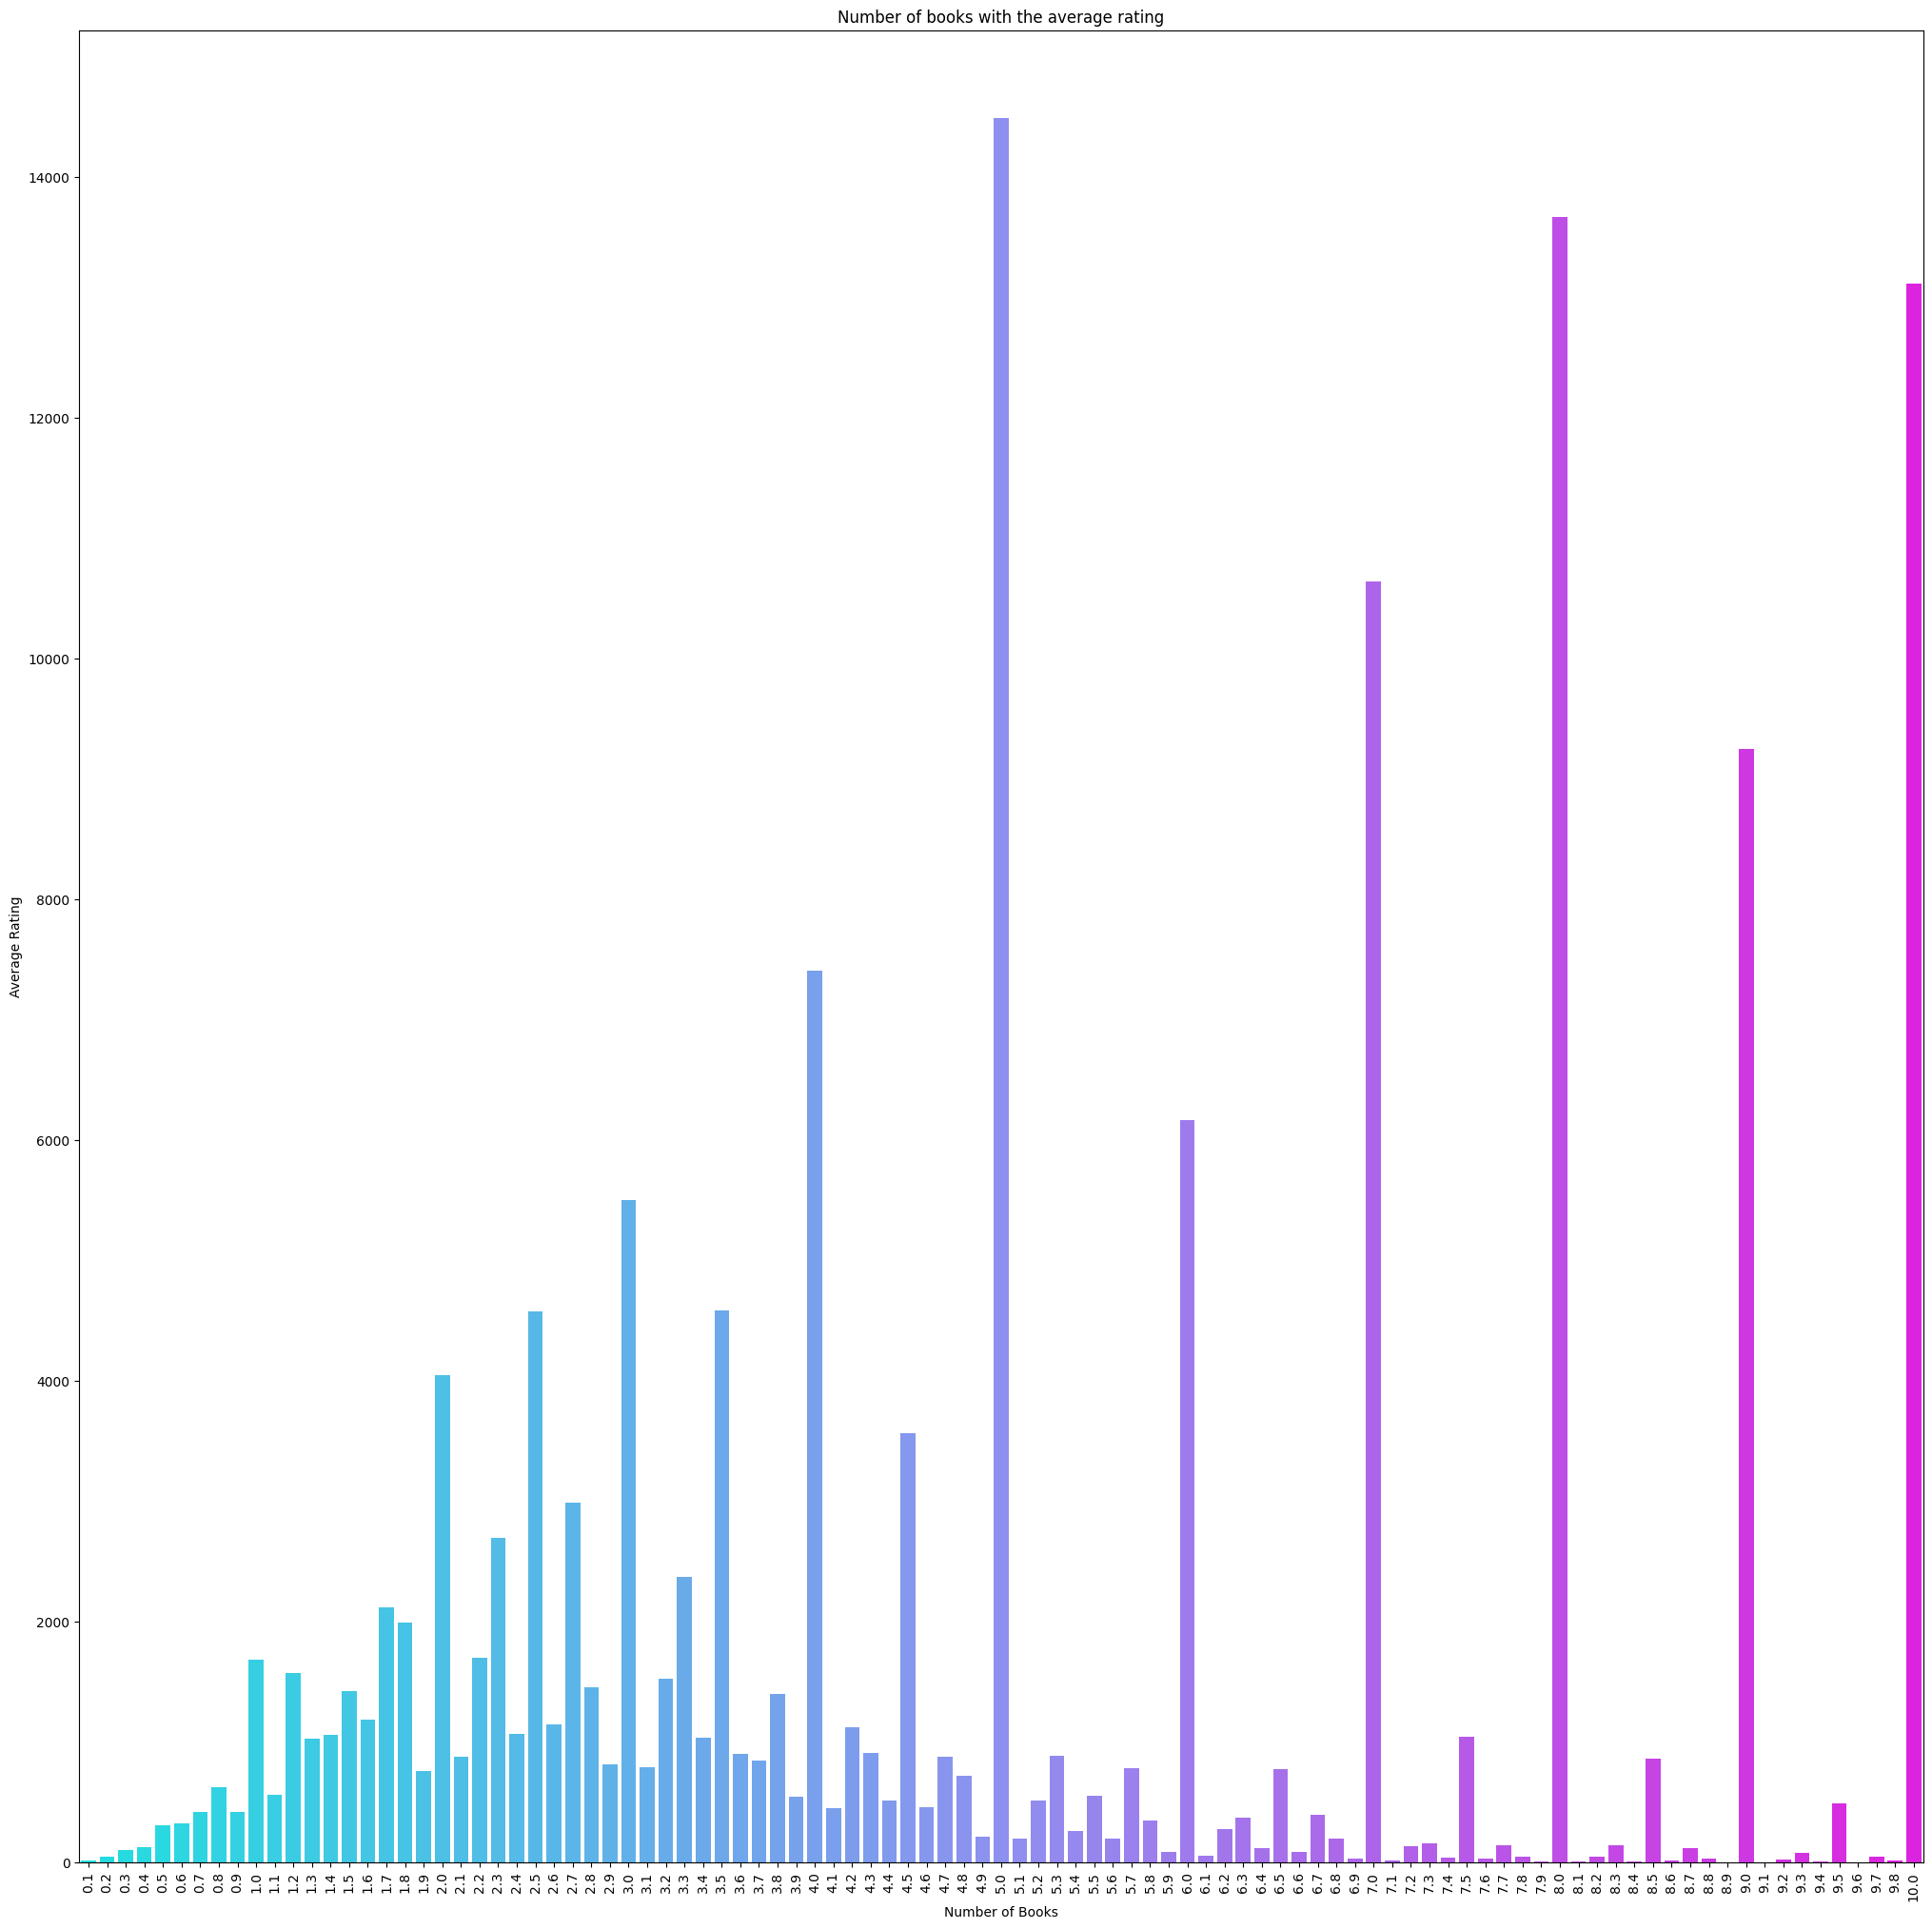

In [107]:
# Set color palette using the "cool" color scheme
cool = sns.color_palette("cool", n_colors=len(ratings_sorted.values))

# Create a figure for the plot with specified size
plt.figure(figsize=(25, 25))

# Exclude books with average rating of 0 and sort the remaining data
ratings_sorted_0_excluded = ratings_sorted.drop(index=0.0).sort_index(ascending=False)

# Create a bar plot using seaborn
sns_plot = sns.barplot(x=ratings_sorted_0_excluded.index, y=ratings_sorted_0_excluded.values, palette=cool)

# Rotate x-axis labels vertically for better readability
plt.xticks(rotation='vertical')

# Set labels for x and y axes
plt.xlabel("Number of Books")
plt.ylabel("Average Rating")

# Set title for the plot
plt.title("Number of books with the average rating")
plt.show()


In [108]:
# Calculate the count of books for each average rating, excluding ratings with value 0.0
# Then, sort the results in descending order and select the top 20 ratings

top_20_ratings = averageRatingUnique['average_rating'].value_counts().drop(index=0.0).sort_values(ascending=False).head(20)


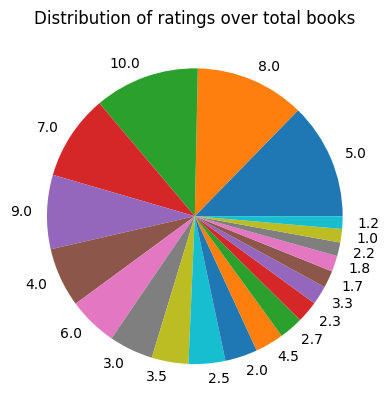

In [109]:
# Visualizing the distribution of top 20 ratings over total books using a pie chart
# creates the pie chart with ratings as slices and their labels
plt.pie(top_20_ratings, labels=top_20_ratings.index)

# sets the title for the pie chart
plt.title("Distribution of ratings over total books")
plt.show()


In [110]:
#Count of unique values in the 'Year-of-Publication' column and retrieve the index values
unique_years = books['Year-Of-Publication'].value_counts().index.values

In [111]:
unique_years

array(['2002', '1999', '2001', '2000', '1998', '1997', '2003', '1996',
       '1995', '1994', '1993', '1992', '1991', '1990', '1989', '1988',
       '1987', '1986', '2004', '1985', '1984', '0', '1983', '1982',
       '1981', '1980', '1979', '1978', '1977', '1976', '1975', '1974',
       '1973', '1972', '1971', '1970', '1969', '1968', '1966', '1967',
       '1965', '1964', '1960', '1961', '1963', '1962', '1959', '1958',
       '1957', '1956', '1955', '1953', '1954', '2005', '1951', '1940',
       '1952', '1920', '1950', '1911', '1942', '1947', '1946', '1930',
       '1923', '1949', '1941', '1939', '1948', '1943', '1945', '1929',
       '2030', '1936', '1901', '1938', '1932', '1937', '1944', '1933',
       '2020', '2006', '1935', '1931', '1900', '1926', '1921', '1909',
       '2010', '1922', '1924', '1902', '2011', '2050', '1927', '1925',
       '1928', 'DK Publishing Inc', '1376', '1897', '1919', '1378',
       '2024', '2008', 'Gallimard', '1934', '2012', '2021', '1806',
       '1906', 

In [112]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [113]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


# Popularity Based Model

Suggests items based on their popularity or overall popularity trends. Instead of personalized recommendations tailored to individual users’ preferences, popularity-based systems recommend items that are already popular among all users.

In the context of book recommendation, a popularity-based recommender system works by recommending books that have been widely read or highly rated by a large number of users.

Here, I have selected the top 100 books that have the highest average ratings and then display them over to the user.

In [114]:
ratings_with_name = ratings.merge(books,on='ISBN')

In [115]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [116]:


# Ensure 'Book-Rating' is numeric, converting non-numeric values to NaN
ratings_with_name['Book-Rating'] = pd.to_numeric(ratings_with_name['Book-Rating'], errors='coerce')

# Drop rows where 'Book-Rating' is NaN
ratings_with_name = ratings_with_name.dropna(subset=['Book-Rating'])

# Group by 'Book-Title' and calculate the mean of 'Book-Rating'
avg_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()

# Rename the column
avg_rating_df.rename(columns={'Book-Rating': 'avg_rating'}, inplace=True)

# Display the DataFrame
print(avg_rating_df)


                                               Book-Title  avg_rating
0        A Light in the Storm: The Civil War Diary of ...    2.250000
1                                   Always Have Popsicles    0.000000
2                    Apple Magic (The Collector's series)    0.000000
3        Ask Lily (Young Women of Faith: Lily Series, ...    8.000000
4        Beyond IBM: Leadership Marketing and Finance ...    0.000000
...                                                   ...         ...
241066                                      Ã?Â?lpiraten.    0.000000
241067                     Ã?Â?rger mit Produkt X. Roman.    5.250000
241068                                Ã?Â?sterlich leben.    7.000000
241069                              Ã?Â?stlich der Berge.    2.666667
241070                                  Ã?Â?thique en toc    4.000000

[241071 rows x 2 columns]


In [117]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [118]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)

In [119]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [120]:
popular_df

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


# Collaborative Filtering Based Approach

Predicts what a user might like based on the preferences of other users who have similar tastes.
Works by analyzing the past behavior or preferences of users to recommend books to a target user.
1. Value experienced users who rated over 200 books: I.e., have studied and reviewed high amount of books with the highest priority.
2. Value books with high ratings:
- Recommend books that have more than 50 ratings i.e., popular and famous books.
- Filter the users who have rated over 200 books using count[1] and filter those more than 50 ratings using sum(count[1]) as well.


In [121]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
padhe_likhe_users = x[x].index

In [122]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(padhe_likhe_users)]

In [123]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [124]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [125]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [126]:
pt.fillna(0,inplace=True)

In [127]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
from sklearn.metrics.pairwise import cosine_similarity

In [129]:
similarity_scores = cosine_similarity(pt)

In [130]:
similarity_scores

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [131]:
cosine_similarity(pt).shape

(706, 706)

In [132]:
def recommend(book_name=None, author_name=None):
    # Check if neither book name nor author name is provided
    if not book_name and not author_name:
        print("Please provide either a book name or an author name.")
        return []

    data = []
    
    # If book_name is provided
    if book_name:
        # Check if the book_name exists in the index
        if book_name not in pt.index:
            print(f"'{book_name}' not found in the dataset.")
            return []
        
        # index fetch
        index = np.where(pt.index == book_name)[0][0]
        similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:5]
        
        for i in similar_items:
            item = []
            temp_df = books[books['Book-Title'] == pt.index[i[0]]]
            item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
            item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
            item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
            
            data.append(item)

    # If author_name is provided
    if author_name:
        # Check if the author exists in the dataset
        if author_name not in books['Book-Author'].values:
            print(f"Author '{author_name}' not found in the dataset.")
            return []

        # Get books by the author and recommend based on author similarity
        author_books = books[books['Book-Author'] == author_name].drop_duplicates('Book-Title')
        
        for _, row in author_books.iterrows():
            item = []
            item.append(row['Book-Title'])
            item.append(row['Book-Author'])
            item.append(row['Image-URL-M'])
            data.append(item)

    return data


In [133]:
recommend('J. K. Rowling')

'J. K. Rowling' not found in the dataset.


[]

In [134]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))

In [135]:
books.drop_duplicates('Book-Title')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271354,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [136]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))

In [137]:
#GEnerate a profile report for the popular_df dataframe 
report = ProfileReport(popular_df)
report 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]